In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import talib
import seaborn as sns
import pickle

%matplotlib inline
plt.style.use('dark_background')

In [2]:
def get_unique_symbs(df):
    unique_symbs = set()
    for i in list(df.columns):
        unique_symbs.add(i[0])
    return unique_symbs

In [17]:
"""Read tickers from official site"""
nasdaq_listed = pd.read_csv('data/nasdaqlisted.txt', delimiter="|")
nasdaq_listed = nasdaq_listed[nasdaq_listed['Test Issue'] == 'N']
nasdaq_listed = nasdaq_listed[nasdaq_listed['Financial Status'] == 'N']
nasdaq_listed = nasdaq_listed[nasdaq_listed['Round Lot Size'] == 100]
nasdaq_listed = nasdaq_listed[nasdaq_listed['ETF'] == 'N']

other_listed = pd.read_csv('data/otherlisted.txt', delimiter="|")
other_listed = other_listed[other_listed['Exchange'] == 'N']
other_listed = other_listed[other_listed['ETF'] == 'N']
other_listed = other_listed[other_listed['Round Lot Size'] == 100]
other_listed = other_listed[other_listed['Test Issue'] == 'N']
other_listed = other_listed[other_listed['Symbol'] == other_listed['NASDAQ Symbol']]
other_listed = other_listed[~other_listed['Symbol'].str.contains("\.")]
other_listed = other_listed[~other_listed['Symbol'].str.contains("\$")]

all_symbols = set(other_listed['Symbol']).union(set(nasdaq_listed['Symbol']))

print('Filtering symbols:', '\nnasdaq', len(nasdaq_listed), '\nothers', len(other_listed), '\nall', len(all_symbols))

Filtering symbols: 
nasdaq 2925 
others 2519 
all 5444


In [19]:
"""Getting tickers with no NaN and high volume"""
tickers_names_aux = " ".join(nasdaq_listed['Symbol'])
hist_downloaded_aux = yf.download(tickers_names_aux, period="1mo", interval="1d", start=None, end=None, actions=False, rounding=True, group_by='ticker', threads=True)

tickers_volM= set()
hist_downloaded_aux = hist_downloaded_aux.dropna(axis=1, how='all')
for tick in get_unique_symbs(hist_downloaded_aux):
    if hist_downloaded_aux[tick,'Volume'].mean() > 200000: #High volume
        tickers_volM.add(tick)

print('tickers_all:', len(all_symbols))
print('tickers_filtered_by_volume:', len(tickers_volM))

with open('data/all_symbols_vol.pickle', 'wb') as handle:
    pickle.dump(tickers_volM, handle)

[*********************100%***********************]  2925 of 2925 completed

14 Failed downloads:
- ZGYH: No data found, symbol may be delisted
- ZGYHW: No data found, symbol may be delisted
- ZGYHR: No data found, symbol may be delisted
- DEAC: No data found, symbol may be delisted
- MBINO: No data found, symbol may be delisted
- ALACW: No data found for this date range, symbol may be delisted
- PHIOW: No data found for this date range, symbol may be delisted
- HHHHU: No data found for this date range, symbol may be delisted
- MLAB: No data found for this date range, symbol may be delisted
- GMAB: No data found, symbol may be delisted
- WIMI: No data found, symbol may be delisted
- GNRSU: No data found, symbol may be delisted
- HCCO: No data found, symbol may be delisted
- LOACR: No data found for this date range, symbol may be delisted
tickers_all: 5444
tickers_filtered_by_volume: 1464


TANNL                                           CTXRW          \
             Open   High    Low  Close Adj Close   Volume    Open    High   
Date                                                                        
2020-03-09    NaN    NaN    NaN    NaN       NaN      NaN     NaN     NaN   
2020-03-10  24.99  24.99  23.25  23.91     23.91  10300.0     NaN     NaN   
2020-03-11  23.02  24.48  22.07  22.90     22.90  18600.0     NaN     NaN   
2020-03-12  22.12  22.12  16.01  18.27     18.27  63200.0     NaN     NaN   
2020-03-13  18.28  23.49  18.28  23.46     23.46  19800.0     NaN     NaN   
2020-03-16  22.80  22.80  17.55  18.70     18.70  30500.0     NaN     NaN   
2020-03-17  18.91  20.17  13.60  13.72     13.72  45900.0     NaN     NaN   
2020-03-18  13.61  13.62   8.34   9.50      9.50  68400.0     NaN     NaN   
2020-03-19   9.71  16.50   9.52  16.00     16.00  45300.0     NaN     NaN   
2020-03-20  15.77  18.00  14.14  15.85     15.85  25700.0     NaN     NaN   
2020-03-23  15.96  16.00  12.08  13.60     13.60  35700.0     NaN     NaN   
2020-03-24  14.07  17.50  14.07  15.48     15.48  27400.0     NaN     NaN   
2020-03-25  14.51  19.95  14.51  18.81     18.81  25700.0     NaN     NaN   
2020-03-26  19.38  19.99  17.95  18.93     18.93  30900.0     NaN     NaN   
2020-03-27  18.50  20.57  18.40  19.69     19.69  19600.0     NaN     NaN   
2020-03-30  19.27  19.69  18.98  19.02     19.02  16100.0     NaN     NaN   
2020-03-31  18.50  19.50  18.50  18.96     18.96  14200.0     NaN     NaN   
2020-04-01  18.36  18.49  16.33  16.50     16.50   8900.0     NaN     NaN   
2020-04-02  16.50  17.95  16.50  17.15     17.15   5900.0     NaN     NaN   
2020-04-03  16.86  17.15  16.41  17.15     17.15   7700.0     NaN     NaN   
2020-04-06  16.27  18.99  16.27  17.75     17.75  19500.0     NaN     NaN   
2020-04-07  18.80  19.00  18.54  18.91     18.91   6900.0     NaN     NaN   
2020-04-08  19.69  20.00  19.41  20.00     20.00   5100.0  0.2999  0.2999   
2020-04-09  20.50  21.69  20.50  21.15     21.15   8700.0     NaN     NaN   

                            ...   MYFW                             AGNC  \
               Low   Close  ...    Low  Close Adj Close   Volume   Open   
Date                        ...                                           
2020-03-09     NaN     NaN  ...    NaN    NaN       NaN      NaN    NaN   
2020-03-10     NaN     NaN  ...    NaN    NaN       NaN      NaN    NaN   
2020-03-11     NaN     NaN  ...    NaN    NaN       NaN      NaN    NaN   
2020-03-12     NaN     NaN  ...    NaN    NaN       NaN      NaN    NaN   
2020-03-13     NaN     NaN  ...  14.48  14.99     14.99   1600.0  12.92   
2020-03-16     NaN     NaN  ...  14.59  14.59     14.59    500.0  11.40   
2020-03-17     NaN     NaN  ...  13.50  14.05     14.05   3000.0  12.12   
2020-03-18     NaN     NaN  ...  11.70  13.16     13.16  13600.0  11.19   
2020-03-19     NaN     NaN  ...  13.00  13.29     13.29    700.0   9.50   
2020-03-20     NaN     NaN  ...  13.00  13.00     13.00    300.0   9.55   
2020-03-23     NaN     NaN  ...  10.75  11.81     11.81  11500.0   9.85   
2020-03-24     NaN     NaN  ...  11.91  12.61     12.61   3700.0  10.97   
2020-03-25     NaN     NaN  ...  12.61  12.61     12.61      0.0  11.62   
2020-03-26     NaN     NaN  ...  13.06  14.15     14.15   3800.0  13.10   
2020-03-27     NaN     NaN  ...  14.00  14.39     14.39   1900.0  12.91   
2020-03-30     NaN     NaN  ...  12.31  13.36     13.36   6100.0  12.85   
2020-03-31     NaN     NaN  ...  13.63  14.14     14.14   6000.0  11.55   
2020-04-01     NaN     NaN  ...  13.21  14.04     14.04   3600.0  10.09   
2020-04-02     NaN     NaN  ...  13.45  13.45     13.45   6400.0   9.60   
2020-04-03     NaN     NaN  ...  13.50  13.50     13.50   3100.0   9.73   
2020-04-06     NaN     NaN  ...  13.51  13.51     13.51   1100.0  10.46   
2020-04-07     NaN     NaN  ...  13.41  13.50     13.50   2000.0  11.19   
2020-04-08  0.2799  0.2799  ...  12.40  13.95     13.95  

In [20]:
"""Get my data"""
with open('data/all_symbols_vol.pickle', 'rb') as handle:
    all_symbols_vol = pickle.load(handle)

tickers_names = " ".join(all_symbols_vol)
hist_downloaded = yf.download(tickers_names, period="3mo", interval="1d", start=None, end=None, actions=False, rounding=True, group_by='ticker', threads=True)
hist_downloaded.to_pickle('data/all3mo.pickle')

[*********************100%***********************]  1464 of 1464 completed

12 Failed downloads:
- TCMD: No data found for this date range, symbol may be delisted
- VIAC: No data found, symbol may be delisted
- HCACW: No data found for this date range, symbol may be delisted
- XPEL: No data found, symbol may be delisted
- AAOI: No data found for this date range, symbol may be delisted
- HEPA: No data found, symbol may be delisted
- STMP: No data found for this date range, symbol may be delisted
- MIK: No data found for this date range, symbol may be delisted
- SEEL: No data found for this date range, symbol may be delisted
- PGEN: No data found, symbol may be delisted
- TBBK: No data found for this date range, symbol may be delisted
- GRIL: No data found, symbol may be delisted


In [70]:
%%time
"""Read my data"""
hist = pd.read_pickle('data/all3mo.pickle')
print(len(hist.columns))
hist = hist.dropna(axis=1, how='all')
print(len(hist.columns))

8784
8712
CPU times: user 2.8 s, sys: 46.9 ms, total: 2.84 s
Wall time: 2.83 s


FNKO: mult: 4.21 | norm: 0.76 | std 4.59 | slope: -0.06 | actual: 3.58 | min: 3.12


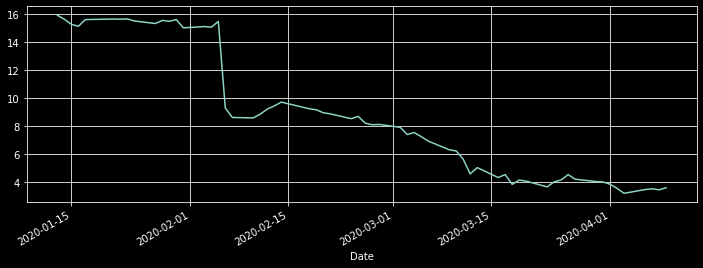

PHIO: mult: 4.87 | norm: 0.79 | std 3.21 | slope: -0.03 | actual: 1.77 | min: 1.6


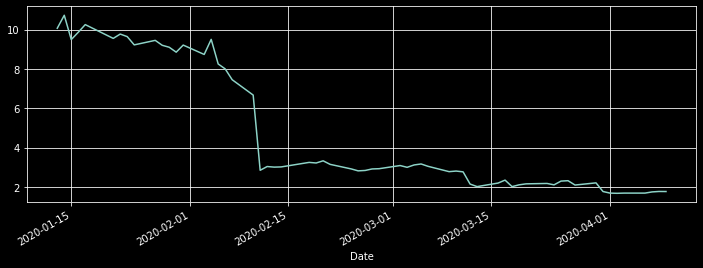

BXRX: mult: 3.48 | norm: 0.71 | std 2.44 | slope: -0.01 | actual: 2.405 | min: 2.16


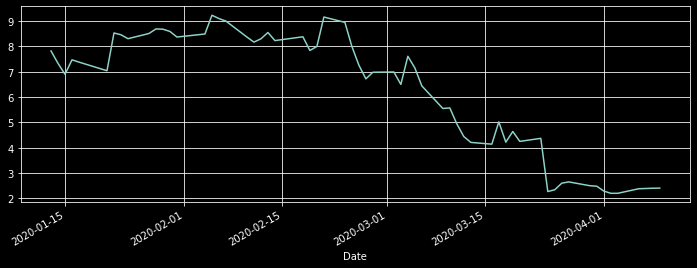

LK: mult: 9.02 | norm: 0.89 | std 11.23 | slope: -2.16 | actual: 4.39 | min: 4.27


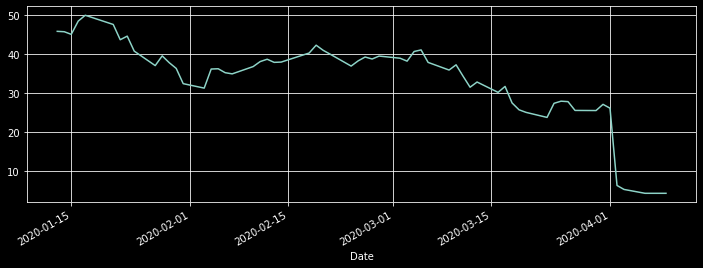

MLND: mult: 5.75 | norm: 0.83 | std 1.93 | slope: -0.38 | actual: 1.42 | min: 1.26


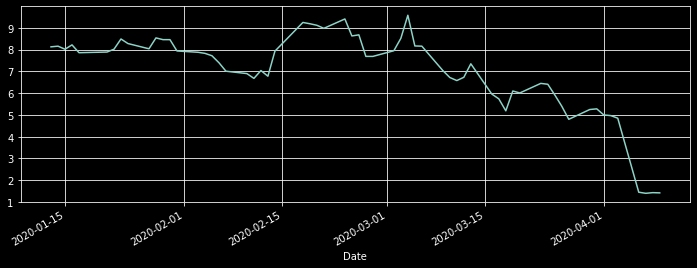

HMHC: mult: 4.05 | norm: 0.75 | std 1.86 | slope: -0.06 | actual: 1.5 | min: 1.27


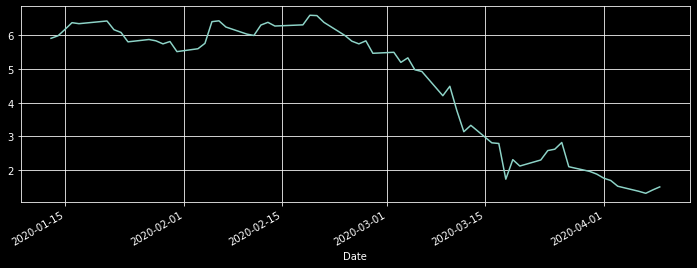

In [149]:
from scipy import stats
import datetime as dt

hist['date_ordinal'] = pd.to_datetime(hist.index).map(dt.datetime.toordinal)

list_interest = []
for tick in get_unique_symbs(hist):
    if tick != 'date_ordinal':
        describe = hist[tick,'Close'].describe()
        discount = (describe['75%']/hist[tick,'Close'].tail(1)[0])
        discount_norm = (describe['75%']-hist[tick,'Close'].tail(1)[0])/describe['75%']
        slope, intercept, r_value, p_value, std_err = stats.linregress(hist['date_ordinal'].tail(10), hist[tick, 'Close'].tail(10))
        if discount_norm > 0.7 and hist[tick,'Close'].tail(1)[0] < hist[tick,'Low'].min()*1.2: # and slope > 0:
            #print(describe, hist[tick,'Close'].tail(5).min())
            print(tick+':', 'mult:', round(discount, 2), '| norm:', round(discount_norm, 2), 
                  '| std', round(describe['std'], 2), '| slope:', round(slope,2), '| actual:', 
                  hist[tick, 'Close'].tail(1)[0], '| min:', hist[tick, 'Low'].min())
            hist[tick,'Close'].plot(figsize=(12,4), grid=True)
            plt.show()